In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import io
import requests

import numpy as np

from keras.datasets import mnist

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_filter = np.where((train_y == 3))
test_filter = np.where((test_y == 3))

In [5]:
train_X, train_y = train_X[train_filter], train_y[train_filter]
test_X, test_y = test_X[test_filter], test_y[test_filter]

In [6]:
data = train_X
n = data.shape[0]
n

6131

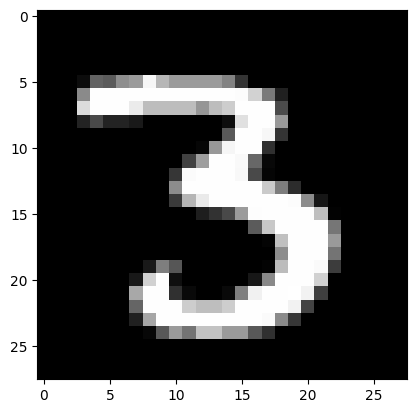

In [7]:
import matplotlib.pyplot as plt

img1 = data[2]
imgshow = plt.imshow(img1, cmap='gray')

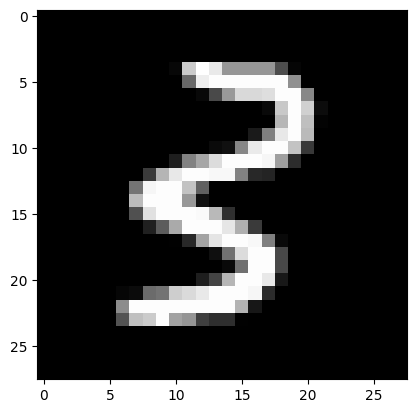

In [8]:
img2 = data[500]
imgshow = plt.imshow(img2, cmap='gray')

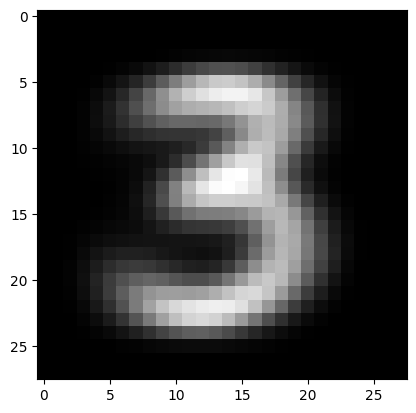

In [9]:
img_mu = np.mean(data, axis=0)
imgshow = plt.imshow(img_mu, cmap='gray')

In [10]:
data_centered = data.reshape(28 * 28, n) - img_mu.reshape(28 * 28, 1)
data_centered.shape

#imgshow = plt.imshow(data_centered[:, 0].reshape(28, 28), cmap='gray')

(784, 6131)

In [11]:
from sklearn.decomposition import PCA, TruncatedSVD
from scipy.sparse.linalg import svds

k = 3

svd = TruncatedSVD(n_components=k, n_iter=7, random_state=13)
svd.fit(np.reshape(data_centered, (data_centered.shape[0], -1)))

u, s, vh = svds(np.reshape(data_centered, (data_centered.shape[0], -1)), k=k, random_state=13)

In [12]:
print(sorted(svd.singular_values_))
print(sorted(s))

[39663.115413314285, 53418.79042672875, 123202.60405324587]
[39663.115413436855, 53418.79042672875, 123202.60405324586]


In [13]:
print(svd.explained_variance_ratio_)

[0.33409941 0.06280931 0.03462627]


Text(0, 0.5, 'explained_variance_ratio_')

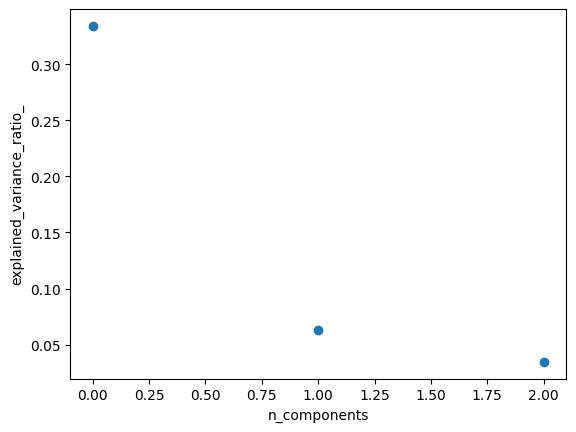

In [14]:
plt.plot(svd.explained_variance_ratio_, "o", linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [15]:
u.shape

(784, 3)

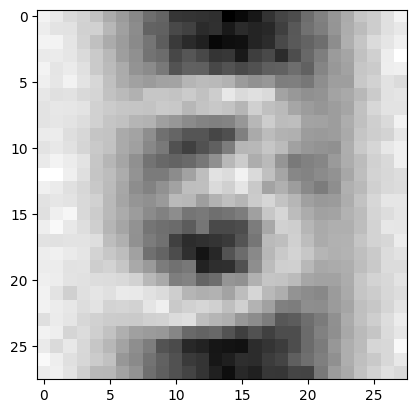

In [16]:
img_svd0 = np.reshape(u[:, 0], (28, 28))
imgshow = plt.imshow(img_svd0, cmap='gray')

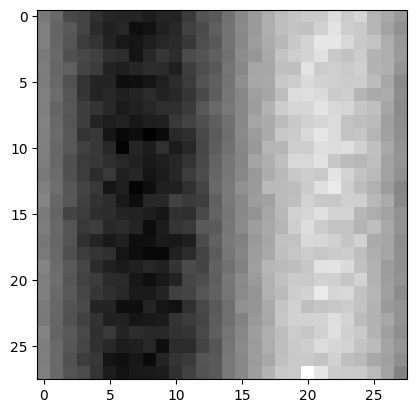

In [17]:
img_svd1 = np.reshape(u[:, 1], (28, 28))
imgshow = plt.imshow(img_svd1, cmap='gray')

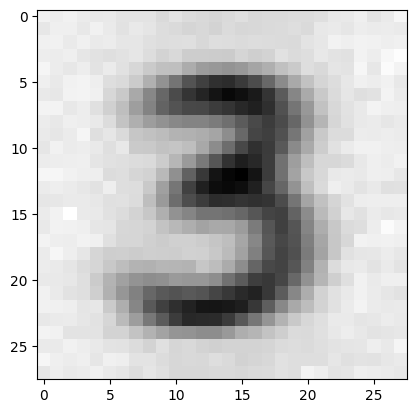

In [18]:
img_svd2 = np.reshape(u[:, 2], (28, 28))
imgshow = plt.imshow(img_svd2, cmap='gray')

In [19]:
k2 = 1

u2, s2, vh2 = svds(np.reshape(data_centered, (data_centered.shape[0], -1)), k=k2, random_state=13)

In [20]:
data_ordered = data[np.argsort(vh2[0])]

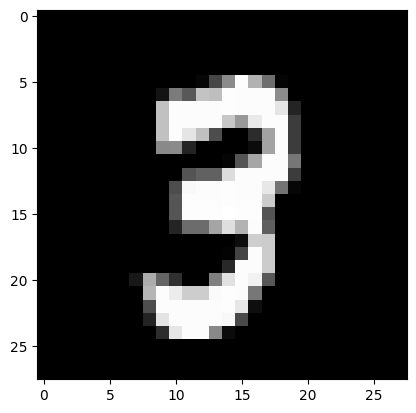

In [21]:
imgshow = plt.imshow(data_ordered[0], cmap='gray')

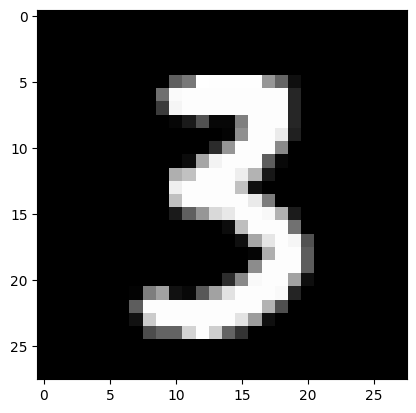

In [22]:
imgshow = plt.imshow(data_ordered[1], cmap='gray')

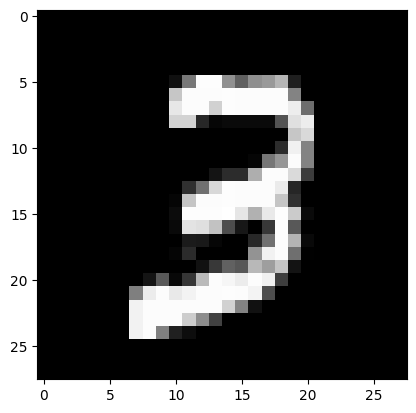

In [23]:
imgshow = plt.imshow(data_ordered[2], cmap='gray')

In [24]:
k3 = 2

u3, s3, vh3 = svds(np.reshape(data_centered, (data_centered.shape[0], -1)), k=k3, random_state=13)

In [25]:
quantiles1 = [np.quantile(vh3[0], x) for x in [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]]
quantiles2 = [np.quantile(vh3[1], x) for x in [0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]]

(-0.0233042292077011,
 0.023021350023442796,
 -0.019209192252643423,
 -0.004264502175622726)

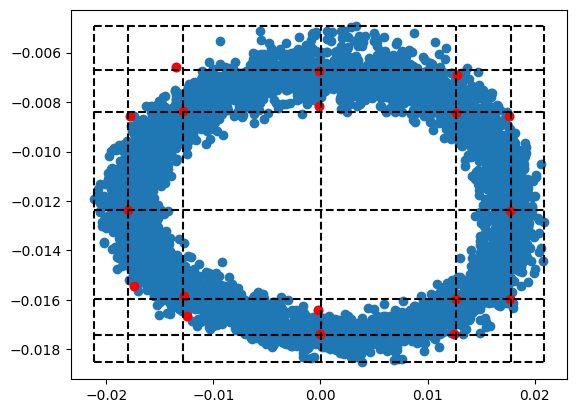

In [26]:
from scipy.spatial.distance import cdist
plt.scatter(vh3[0], vh3[1], linewidth=1)
for q1 in quantiles1:
    plt.plot([q1 for _ in quantiles2], quantiles2, "--", c='black')
for q2 in quantiles2:
    plt.plot(quantiles1, [q2 for _ in quantiles2], "--", c='black')
for q1 in quantiles1[1:-1]:
  for q2 in quantiles2[1:-1]:
      closest = vh3.T[np.argsort(cdist(vh3.T, [[q1, q2]])[:, 0])[0]]
      if np.sort(cdist(vh3.T, [[q1, q2]])[:, 0])[0] < 0.001:
          plt.scatter(closest[0], closest[1], c='red')
plt.axis('tight')